Metrics per class:
Class [i]: {'accuracy': 0.9472093491839613, 'precision': 0.7577854671280276, 'recall': 0.926657263751763, 'f1_score': 0.833756345177665}
Class d: {'accuracy': 0.9959701793270199, 'precision': 0.9789473684210527, 'recall': 0.8378378378378378, 'f1_score': 0.9029126213592233}
Class e: {'accuracy': 0.9852911545436228, 'precision': 0.8916256157635468, 'recall': 0.9258312020460358, 'f1_score': 0.9084065244667503}
Class a: {'accuracy': 0.9921418496876889, 'precision': 0.9333333333333333, 'recall': 0.9068825910931174, 'f1_score': 0.919917864476386}
Class r: {'accuracy': 0.9887165021156559, 'precision': 0.9558011049723757, 'recall': 0.7828054298642534, 'f1_score': 0.8606965174129353}
Class [s]: {'accuracy': 0.9435825105782792, 'precision': 0.6984304932735426, 'recall': 0.9826498422712934, 'f1_score': 0.8165137614678899}
Class t: {'accuracy': 0.9911343945194439, 'precision': 0.9748953974895398, 'recall': 0.8597785977859779, 'f1_score': 0.9137254901960784}
Class m: {'accuracy':

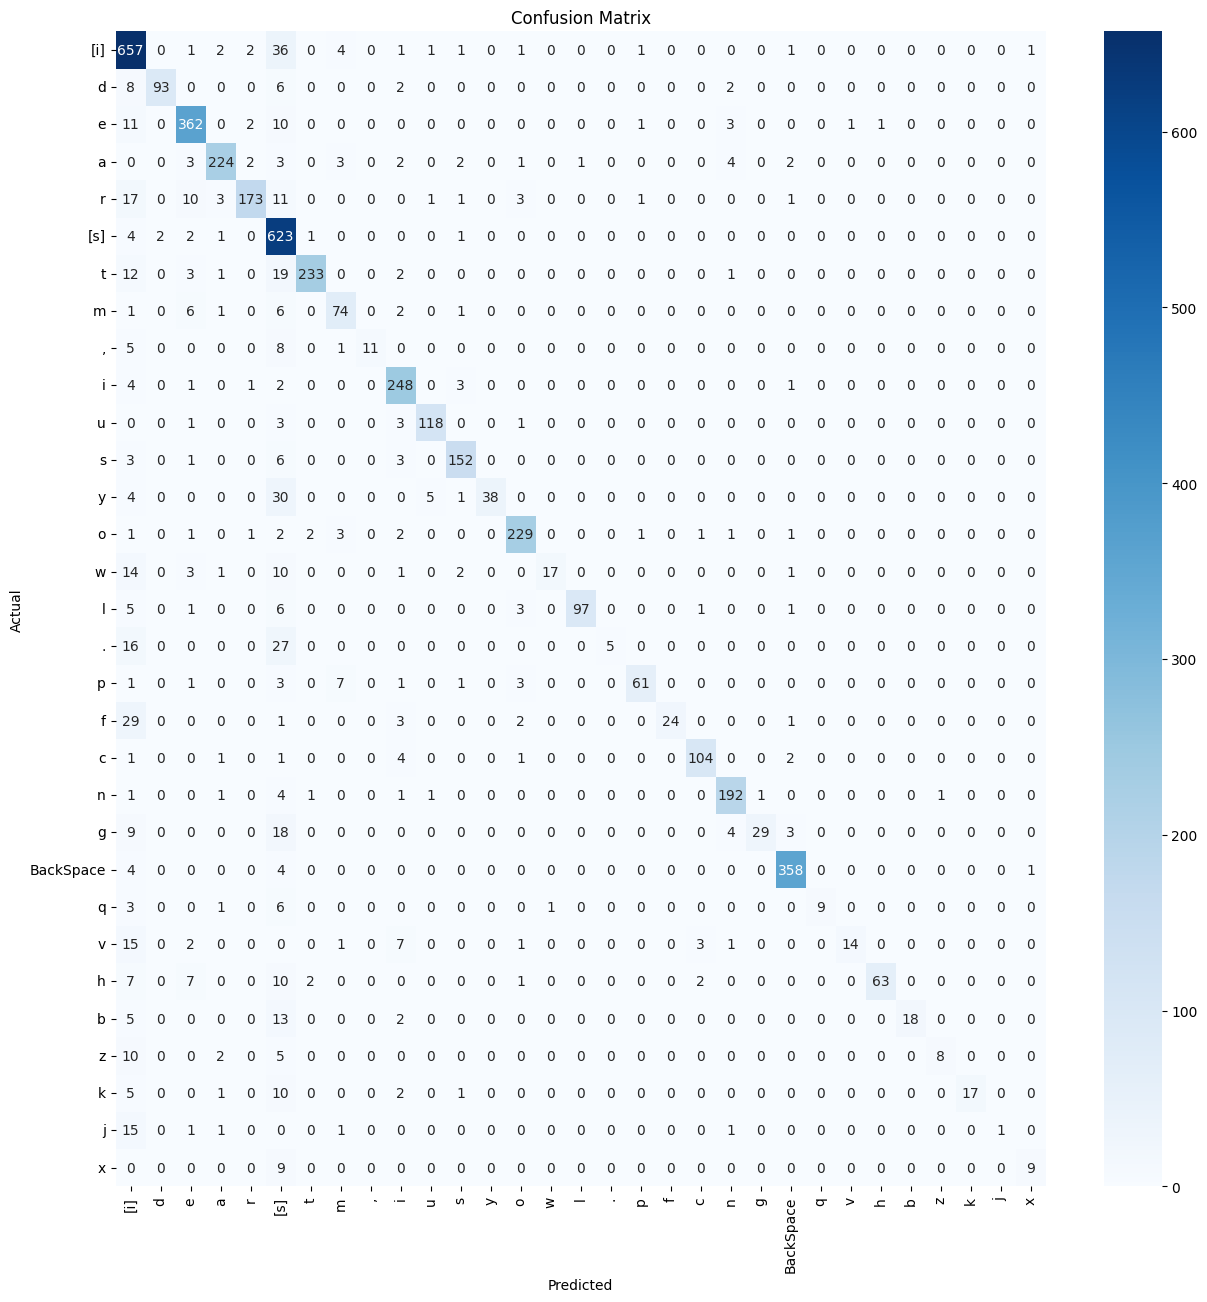

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Read the CSV file
df = pd.read_csv('test_result.csv')

# Ensure the column names are correct
assert 'target' in df.columns, "Column 'target' not found in the CSV"
assert 'pred' in df.columns, "Column 'pred' not found in the CSV"

# Calculate per-class metrics
unique_classes = df['target'].unique()
metrics_per_class = {}

for cls in unique_classes:
    # Get the binary true/false for the current class
    y_true = (df['target'] == cls).astype(int)
    y_pred = (df['pred'] == cls).astype(int)
    
    metrics_per_class[cls] = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1_score': f1_score(y_true, y_pred, zero_division=0)
    }

# Calculate overall metrics
overall_accuracy = accuracy_score(df['target'], df['pred'])
overall_precision = precision_score(df['target'], df['pred'], average='weighted', zero_division=0)
overall_recall = recall_score(df['target'], df['pred'], average='weighted', zero_division=0)
overall_f1 = f1_score(df['target'], df['pred'], average='weighted', zero_division=0)

# Print the metrics
print("Metrics per class:")
for cls, metrics in metrics_per_class.items():
    print(f"Class {cls}: {metrics}")

print("\nOverall Metrics:")
print(f"Accuracy: {overall_accuracy}")
print(f"Precision: {overall_precision}")
print(f"Recall: {overall_recall}")
print(f"F1 Score: {overall_f1}")

# Draw the confusion matrix and heat map
conf_matrix = confusion_matrix(df['target'], df['pred'], labels=unique_classes)
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=unique_classes, yticklabels=unique_classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [4]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(df['target'], df['pred'], output_dict=True)

# Print the per-class and overall metrics
print("Classification Report:")
print(classification_report(df['target'], df['pred']))

Classification Report:
              precision    recall  f1-score   support

           ,       1.00      0.44      0.61        25
           .       1.00      0.10      0.19        48
   BackSpace       0.96      0.98      0.97       367
         [i]       0.76      0.93      0.83       709
         [s]       0.70      0.98      0.82       634
           a       0.93      0.91      0.92       247
           b       1.00      0.47      0.64        38
           c       0.94      0.91      0.92       114
           d       0.98      0.84      0.90       111
           e       0.89      0.93      0.91       391
           f       1.00      0.40      0.57        60
           g       0.97      0.46      0.62        63
           h       0.98      0.68      0.81        92
           i       0.87      0.95      0.91       260
           j       1.00      0.05      0.10        20
           k       1.00      0.47      0.64        36
           l       0.99      0.85      0.92       114
    

In [5]:
# Calculate per-class accuracy
per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

print("\nPer-Class Accuracy:")
for cls, accuracy in zip(df['target'].unique(), per_class_accuracy):
    print(f"Class {cls}: {accuracy:.2f}")



Per-Class Accuracy:
Class [i]: 0.93
Class d: 0.84
Class e: 0.93
Class a: 0.91
Class r: 0.78
Class [s]: 0.98
Class t: 0.86
Class m: 0.81
Class ,: 0.44
Class i: 0.95
Class u: 0.94
Class s: 0.92
Class y: 0.49
Class o: 0.93
Class w: 0.35
Class l: 0.85
Class .: 0.10
Class p: 0.78
Class f: 0.40
Class c: 0.91
Class n: 0.95
Class g: 0.46
Class BackSpace: 0.98
Class q: 0.45
Class v: 0.32
Class h: 0.68
Class b: 0.47
Class z: 0.32
Class k: 0.47
Class j: 0.05
Class x: 0.50
